In [1]:
from pathlib import Path
from matplotlib import pyplot as plt
from collections import defaultdict
from datetime import datetime as dt
from bs4 import BeautifulSoup as bs
from IPython.core.display import HTML
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats
import numpy as np
import plotly.express as px
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.signal import savgol_filter

In [15]:
b=16

In [16]:
df = pd.read_csv('batterieDataPériode32.csv', low_memory = False)
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])
df

,TIMESTAMP,Batt_Li_Voltage,Batt_Li_Current,Batt_Li_Power,Batt_Li_SoC,PV_Voltage,PV_Power,Batt_Li_SetPower_EMS,LOAD_Current,PV_Current
0,2022-07-20 00:00:00,26.59,0.000,0.00,82.70,1.005,0.00,-76.73,0.084,0.000
1,2022-07-20 00:00:05,26.59,0.000,0.00,82.70,1.005,0.00,-76.73,0.084,0.000
2,2022-07-20 00:00:10,26.59,0.000,0.00,82.70,1.005,0.00,-76.73,0.084,0.000
3,2022-07-20 00:00:15,26.59,0.000,0.00,82.70,1.005,0.00,-76.73,0.084,0.000
4,2022-07-20 00:00:20,26.59,0.000,0.00,82.70,1.005,0.00,-76.73,0.083,0.000
...,...,...,...,...,...,...,...,...,...,...
120955,2022-07-26 23:59:35,25.10,0.942,23.65,19.24,25.080,0.68,21.76,0.870,0.027
120956,2022-07-26 23:59:40,25.10,0.943,23.67,19.24,25.080,0.65,21.76,0.870,0.026
120957,2022-07-26 23:59:45,25.10,0.950,23.85,19.24,25.070,0.68,21.96,0.878,0.027
120958,2022-07-26 23:59:50,25.10,0.950,23.85,19.23,25.070,0.68,21.96,0.878,0.027


In [17]:
a = len(df['Batt_Li_Voltage']-1)
a = a/b
a = int(a)
if(a%2 == 0):
    a = a+1
    
df_filtered = df
df_filtered['Batt_Li_Voltage'] =savgol_filter(df['Batt_Li_Voltage'],a , 3)
df_filtered['Batt_Li_Current'] =savgol_filter(df['Batt_Li_Current'],a , 3)
df_filtered

,TIMESTAMP,Batt_Li_Voltage,Batt_Li_Current,Batt_Li_Power,Batt_Li_SoC,PV_Voltage,PV_Power,Batt_Li_SetPower_EMS,LOAD_Current,PV_Current
0,2022-07-20 00:00:00,26.592504,0.000000,0.00,82.70,1.005,0.00,-76.73,0.084,0.000
1,2022-07-20 00:00:05,26.592498,0.000000,0.00,82.70,1.005,0.00,-76.73,0.084,0.000
2,2022-07-20 00:00:10,26.592493,0.000000,0.00,82.70,1.005,0.00,-76.73,0.084,0.000
3,2022-07-20 00:00:15,26.592487,0.000000,0.00,82.70,1.005,0.00,-76.73,0.084,0.000
4,2022-07-20 00:00:20,26.592482,0.000000,0.00,82.70,1.005,0.00,-76.73,0.083,0.000
...,...,...,...,...,...,...,...,...,...,...
120955,2022-07-26 23:59:35,25.007110,1.970528,23.65,19.24,25.080,0.68,21.76,0.870,0.027
120956,2022-07-26 23:59:40,25.006461,1.971893,23.67,19.24,25.080,0.65,21.76,0.870,0.026
120957,2022-07-26 23:59:45,25.005811,1.973258,23.85,19.24,25.070,0.68,21.96,0.878,0.027
120958,2022-07-26 23:59:50,25.005162,1.974625,23.85,19.23,25.070,0.68,21.96,0.878,0.027


In [18]:
df_discharge = df_filtered.loc[((df_filtered['LOAD_Current']-df_filtered['PV_Current']) >= 0)]
df_charge = df_filtered.loc[((df_filtered['LOAD_Current']-df_filtered['PV_Current']) <= 0)]

In [31]:
df_discharge = df_filtered.loc[((df_filtered['Batt_Li_Current']) >= 0)]
df_charge = df_filtered.loc[((df_filtered['Batt_Li_Current']) <= 0)]

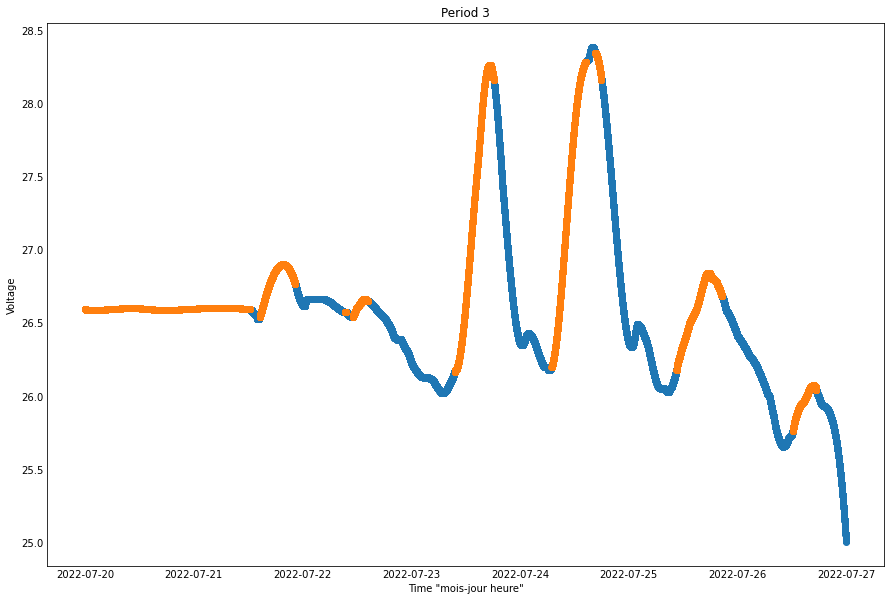

In [33]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(df_discharge['TIMESTAMP'], df_discharge['Batt_Li_Voltage'], label='Discharge',linewidth=1)
ax.scatter(df_charge['TIMESTAMP'], df_charge['Batt_Li_Voltage'], label='Charge',linewidth=1)
ax.set_title('Period 3')
ax.set_xlabel('Time "mois-jour heure"')
ax.set_ylabel('Voltage')
ax.tick_params(axis='both', which='both', length=0)

Text(0, 0.5, 'Current')

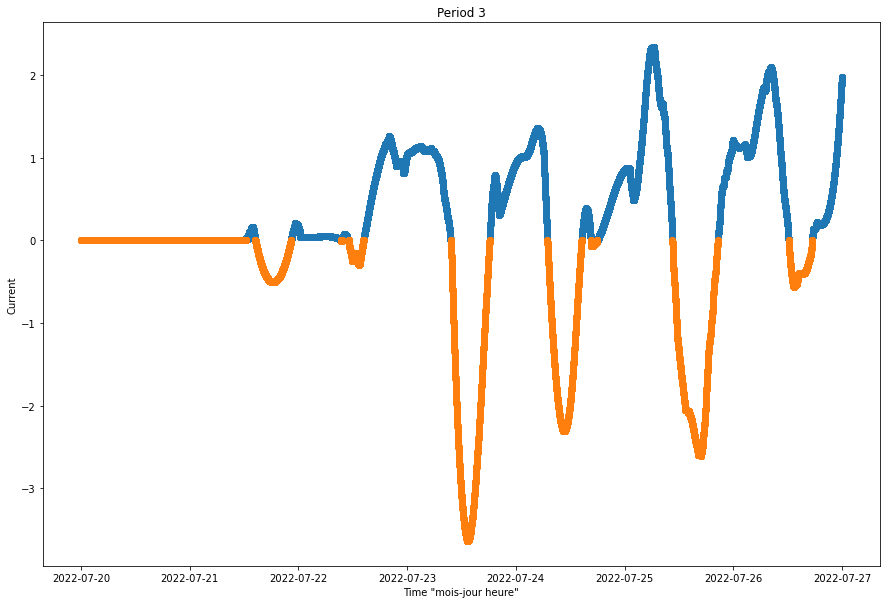

In [34]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(df_discharge['TIMESTAMP'], df_discharge['Batt_Li_Current'])
ax.scatter(df_charge['TIMESTAMP'], df_charge['Batt_Li_Current'])
ax.set_title('Period 3')
ax.set_xlabel('Time "mois-jour heure"')
ax.set_ylabel('Current')

In [56]:
Min_Current = '2021-12-31 00:00:00'
Max_Current = '2022-02-01 00:00:00'

df_period = df.loc[(df['TIMESTAMP'] >= start_date) & (df['TIMESTAMP'] <= end_date), ['TIMESTAMP', 'Batt_Li_SetPower_EMS','Batt_Li_SoC']]

In [61]:
start_date = '2022-07-24 17:00:00'
end_date = '2022-07-25 12:00:00'

df_period1 = df_discharge.loc[(df_discharge['TIMESTAMP'] >= start_date) & (df_discharge['TIMESTAMP'] <= end_date), ['TIMESTAMP', 'Batt_Li_Voltage','Batt_Li_SoC']]

start_date = '2022-07-24 17:00:00'
end_date = '2022-07-25 12:00:00'

df_period = df_discharge.loc[(df_discharge['TIMESTAMP'] >= start_date) & (df_discharge['TIMESTAMP'] <= end_date), ['TIMESTAMP', 'Batt_Li_Voltage','Batt_Li_SoC']]


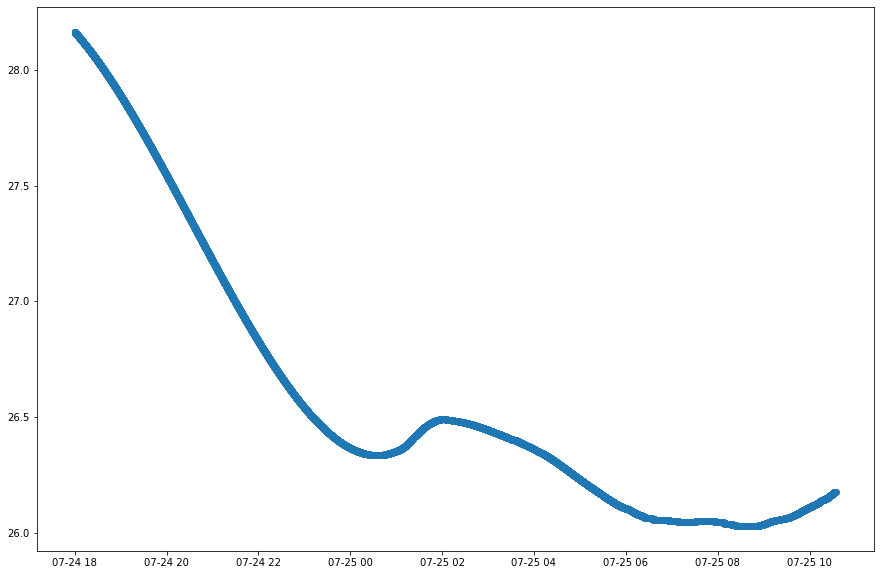

In [62]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(df_period['TIMESTAMP'], df_period['Batt_Li_Voltage'], label='Discharge',linewidth=1)

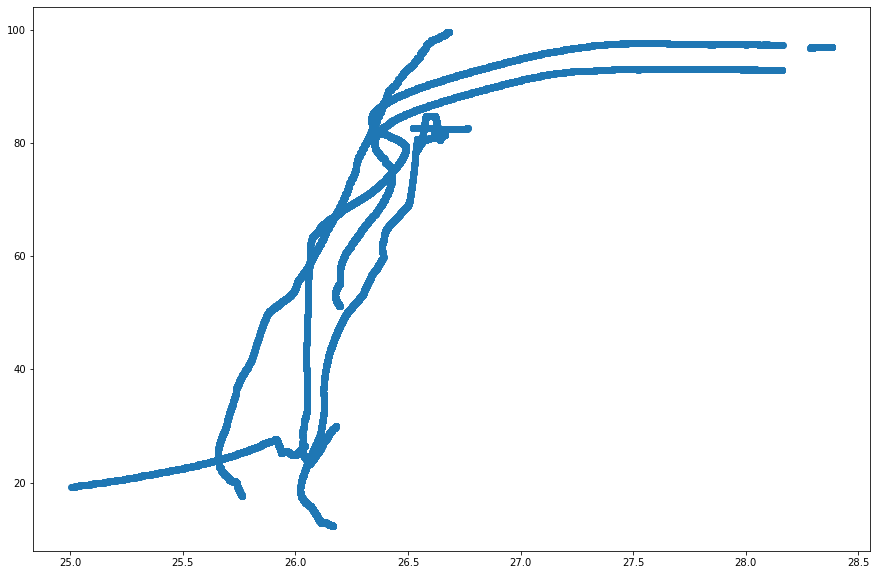

In [65]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(df_discharge['Batt_Li_Voltage'], df_discharge['Batt_Li_SoC'], label='Discharge',linewidth=1)

Text(0, 0.5, 'Current')

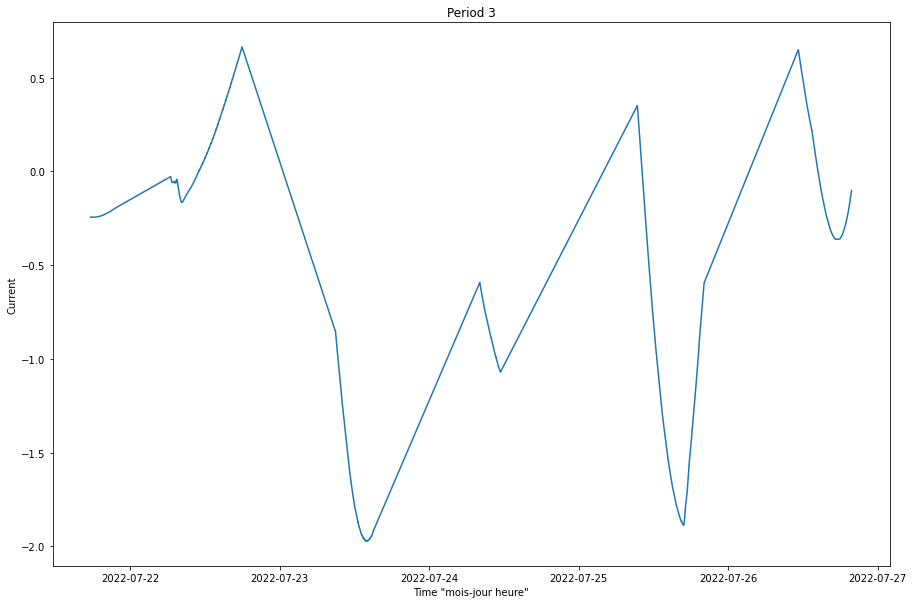

In [11]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(df_charge['TIMESTAMP'], df_charge['Batt_Li_Current'])

ax.set_title('Period 3')
ax.set_xlabel('Time "mois-jour heure"')
ax.set_ylabel('Current')

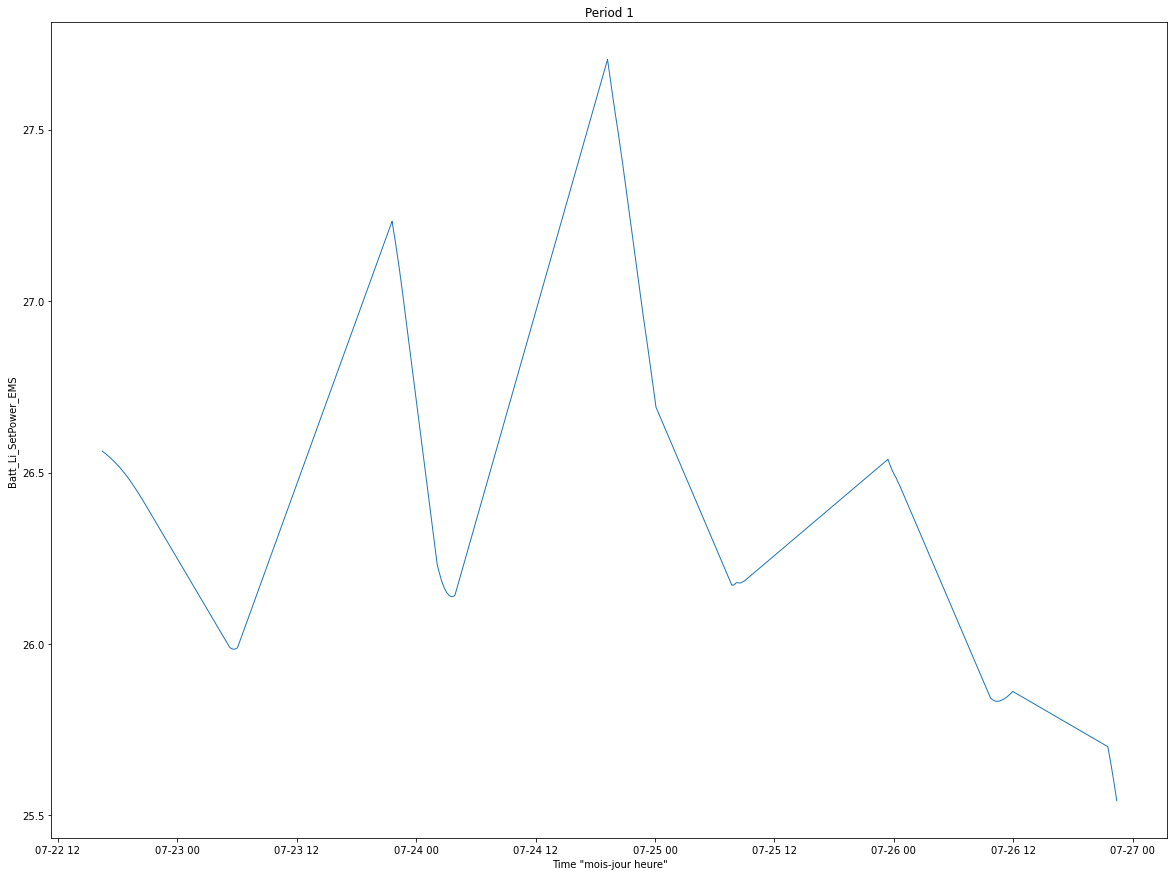

In [19]:
Courant_Bas = 0.5
Courant_Sup = 1

df_period = df_filtered.loc[(df_filtered['Batt_Li_Current'] >= Courant_Bas) & (df_filtered['Batt_Li_Current'] <= Courant_Sup), ['TIMESTAMP', 'Batt_Li_Voltage','Batt_Li_SoC']]

fig, ax = plt.subplots(figsize=(20, 15))

ax.plot(df_period['TIMESTAMP'], df_period['Batt_Li_Voltage'], label='voltage-lisse',linewidth=1)

ax.set_title('Period 1')
ax.set_xlabel('Time "mois-jour heure"')
ax.set_ylabel('Batt_Li_SetPower_EMS')

pd.set_option('display.max_rows', None)

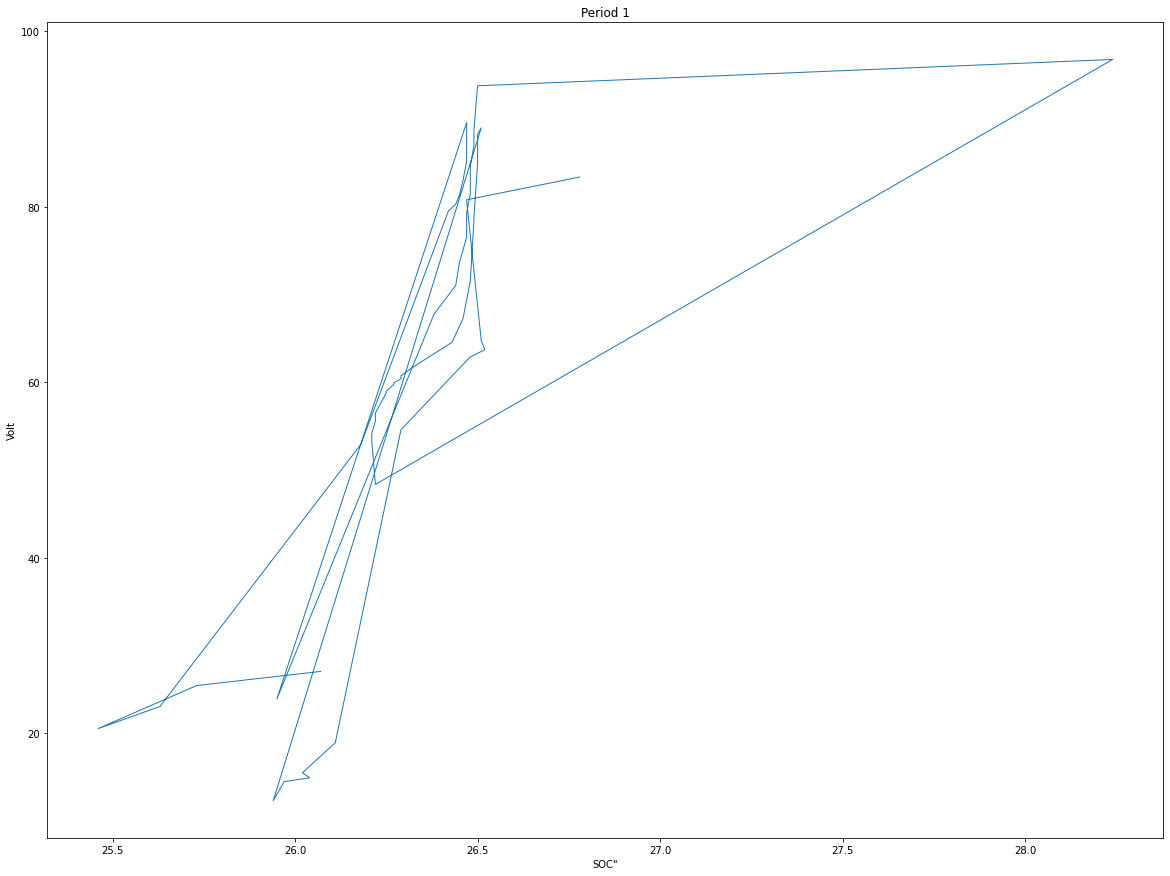

In [17]:
fig, ax = plt.subplots(figsize=(20, 15))

ax.plot(df_period['Batt_Li_Voltage'], df_period['Batt_Li_SoC'], label='voltage-lisse',linewidth=1)

ax.set_title('Period 1')
ax.set_xlabel('SOC"')
ax.set_ylabel('Volt')

pd.set_option('display.max_rows', None)

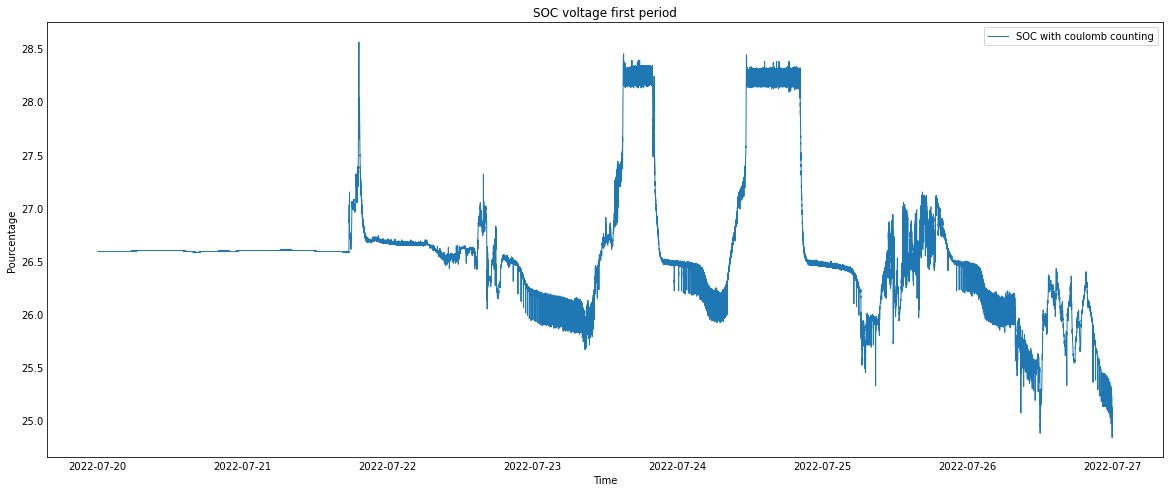

In [7]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(df['TIMESTAMP'], df['Batt_Li_Voltage'],label='SOC with coulomb counting',linewidth=1, markersize=0.5)

ax.set_title('SOC voltage first period')
ax.set_xlabel('Time')
ax.set_ylabel('Pourcentage')
ax.tick_params(axis='both', which='both', length=0)
fig.savefig('SoC determined with tension as a function of SoC during first period')
plt.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))
a = len(df_period['Batt_Li_Voltage']-1)
Lisse = savgol_filter(df_period['Batt_Li_Voltage'],3001 , 3)

ax.plot(df_period['TIMESTAMP'], Lisse, label='voltage-lisse',linewidth=1)

ax.set_title('Period 1')
ax.set_xlabel('Time "mois-jour heure"')
ax.set_ylabel('Batt_Li_SetPower_EMS')

pd.set_option('display.max_rows', None)